# 1. Introduction.
In 1954, the linguist André-Georges Haudricourt published a very influential paper in which he associates the origin of tones in vietnamese with the disparition of the disparition of glottal consonants *at the end of words*. This hypothesis gave rise to an interest in studying "tonogesis" which would be the origin of tones in the language of the world. A reccurent explanation given for asian tone languages is similar to that of Haudricourt for vietnamese : the disparition of glottal stops or voiceless fricative (/h/) in the end of words (it is supposedly the case for white hmong and chinese). 

Our question was the following : Are glottal consonants terminating words a reliable factor for tonogesis ?
But we soon realised that it would be too difficult to test, as it would require to have access to historical data, for example.
Though if we show, comparing phonological inventories, that a language with tones is more likely to have those consonants than one deprived of tones, we would have shown those consonants are at least associated with the presence of tones. That is the prediction we propose to test.

Of course we implicitly assumed that tonogesis resulting in the disparition of glottal consonants at the end of words does not imply their complete disparition from a language's phonology. It is indeed the case in most examples that we know (such as Vietnamese, Thai), *except for mandarin chinese*.

Also, we've been taking examples from asian languages so far, but our study aims at seeig if those tonogesis assumptions can apply to different tonal languages or if they are case-specific (only the case for asian families of languages)

# 2. Data

## 2.1 Library import

In [20]:
import pandas as pd

# Data visualisation (plots).
import seaborn as sns
import matplotlib.pyplot as plt 

# Creation of maps.
from mpl_toolkits.basemap import Basemap 


# 2.2 Data Manipulation

We will first extract data from the WALS database (available here : https://github.com/cldf-datasets/wals/) in order to obtain a set of language for which the quality of its tone system is known.

The data provided by WALS on its Github repository is in the cldf format, which means the information is scattered over various csv files. To look more conveniently at the data we first need to combine the information contained in the following csv files.

In [21]:
chapters = pd.read_csv("Data//chapters.csv")
values = pd.read_csv("Data//values.csv")
languages = pd.read_csv("Data//languages.csv")
codes = pd.read_csv("Data//codes.csv")

According to WALS website "Tone" is the chapter named "13A". And when we look at the values.csv we understand that the column "Parameter_ID" actually refers to the id of the corresponding chapter for each value of the value.csv file. So we need to select all the values where the Parameter_ID is 13A in order to get the values for the "Tone" chapter.


In [22]:
# Note that we create here the 'df' dataframe thta we will be using henceforth.
df = values[values['Parameter_ID'] == "13A"]
df

,ID,Language_ID,Parameter_ID,Value,Code_ID,Comment,Source,Example_ID
168,13A-abk,abk,13A,1,13A-1,NaN,Hewitt-1979,NaN
652,13A-acm,acm,13A,2,13A-2,NaN,Olmsted-1964;Olmsted-1966,NaN
715,13A-aco,aco,13A,3,13A-3,NaN,Miller-1966,NaN
914,13A-adk,adk,13A,2,13A-2,NaN,Landaburu-1979,NaN
1024,13A-aea,aea,13A,1,13A-1,NaN,Bergsland-1956;Bergsland-1959;Bergsland-1994;C...,NaN
...,...,...,...,...,...,...,...,...
75529,13A-yus,yus,13A,1,13A-1,NaN,Krauss-1975,NaN
75752,13A-zan,zan,13A,2,13A-2,NaN,Tucker-and-Hackett-1959,NaN
76035,13A-zqc,zqc,13A,1,13A-1,NaN,Wonderly-1951a,NaN
76204,13A-zul,zul,13A,2,13A-2,NaN,Canonici-1989;Doke-1926;Doke-1961;Poulos-and-B...,NaN


Now we need to merge this data with the language data, accessible in the ‘languages’ file. To do this, we're going to use a common column between our two datasets, that of the identifiers, called ‘ID’ in the ‘values’ file and Language_ID in the ‘languages’ file.

In [23]:
# We start by removing unnecessary columns in the ‘languages’ dataset and in codes'
languages = languages.drop(columns=['Source', 'ISO639P3code', 'Subfamily', 'Genus', 'GenusIcon', 'ISO_codes', 'Samples_100', 'Samples_200', 'Country_ID', 'Parent_ID'])
codes = codes.drop(columns=["Parameter_ID", "Name", "icon", "Number"])
# We standardise the column names associated with the language id in the ‘languages’ dataset and the code id in the ‘code’ dataset.
languages.rename(columns={'ID' : 'Language_ID'}, inplace=True)
codes=codes.rename(columns={'ID' : 'Code_ID'})

# We merge df with languages
df = df.merge(languages, on  ="Language_ID" )
# then with codes
df = df.merge(codes, on = "Code_ID" )

df

,ID,Language_ID,Parameter_ID,Value,Code_ID,Comment,Source,Example_ID,Name,Macroarea,Latitude,Longitude,Glottocode,Family,Description
0,13A-abk,abk,13A,1,13A-1,NaN,Hewitt-1979,NaN,Abkhaz,Eurasia,43.083333,41.000000,abkh1244,Northwest Caucasian,No tones
1,13A-acm,acm,13A,2,13A-2,NaN,Olmsted-1964;Olmsted-1966,NaN,Achumawi,North America,41.500000,-121.000000,achu1247,Hokan,Simple tone system
2,13A-aco,aco,13A,3,13A-3,NaN,Miller-1966,NaN,Acoma,North America,34.916667,-107.583333,west2632,Keresan,Complex tone system
3,13A-adk,adk,13A,2,13A-2,NaN,Landaburu-1979,NaN,Andoke,South America,-0.666667,-72.000000,ando1256,Andoke,Simple tone system
4,13A-aea,aea,13A,1,13A-1,NaN,Bergsland-1956;Bergsland-1959;Bergsland-1994;C...,NaN,Aleut (Eastern),North America,54.750000,-164.000000,aleu1260,Eskimo-Aleut,No tones
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
522,13A-yus,yus,13A,1,13A-1,NaN,Krauss-1975,NaN,Yupik (Siberian),Eurasia,65.000000,-173.000000,cent2128,Eskimo-Aleut,No tones
523,13A-zan,zan,13A,2,13A-2,NaN,Tucker-and-Hackett-1959,NaN,Zande,Africa,4.000000,26.000000,zand1248,Niger-Congo,Simple tone system
524,13A-zqc,zqc,13A,1,13A-1,NaN,Wonderly-1951a,NaN,Zoque (Copainalá),North America,17.000000,-93.250000,copa1236,Mixe-Zoque,No tones
525,13A-zul,zul,13A,2,13A-2,NaN,Canonici-1989;Doke-1926;Doke-1961;Poulos-and-B...,NaN,Zulu,Africa,-30.000000,30.000000,zulu1248,Niger-Congo,Simple tone system


In [24]:
# We remove the unnecessary columns in the final df and rename the value description column.
df.rename(columns={"Description" : "Tone system"}, inplace=True)
df  = df.drop(columns=["Language_ID", "ID", "Parameter_ID", "Code_ID", "Comment", "Source", "Example_ID"])
df

,Value,Name,Macroarea,Latitude,Longitude,Glottocode,Family,Tone system
0,1,Abkhaz,Eurasia,43.083333,41.000000,abkh1244,Northwest Caucasian,No tones
1,2,Achumawi,North America,41.500000,-121.000000,achu1247,Hokan,Simple tone system
2,3,Acoma,North America,34.916667,-107.583333,west2632,Keresan,Complex tone system
3,2,Andoke,South America,-0.666667,-72.000000,ando1256,Andoke,Simple tone system
4,1,Aleut (Eastern),North America,54.750000,-164.000000,aleu1260,Eskimo-Aleut,No tones
...,...,...,...,...,...,...,...,...
522,1,Yupik (Siberian),Eurasia,65.000000,-173.000000,cent2128,Eskimo-Aleut,No tones
523,2,Zande,Africa,4.000000,26.000000,zand1248,Niger-Congo,Simple tone system
524,1,Zoque (Copainalá),North America,17.000000,-93.250000,copa1236,Mixe-Zoque,No tones
525,2,Zulu,Africa,-30.000000,30.000000,zulu1248,Niger-Congo,Simple tone system


Now we shall combine this data with the phonological data provided by phoible (https://github.com/phoible/dev) to create a binary ‘glottal_consonants’ column indicating the presence (1) or absence (0) of either . or . in the phonological inventory of each of the 527 df languages.

In [25]:
# Loading of phoible data
phoible = pd.read_csv("Data//phoible.csv")

# Here we filter the dataset in order to keep only the rows relevant for the set of 527 languages we ended up with, by using their glottocodes.
phoible = phoible[phoible["Glottocode"].isin(df["Glottocode"])]
phoible

C:\Users\sacha\AppData\Local\Temp\ipykernel_4696\3314926738.py:2: DtypeWarning: Columns (4,7,8,11) have mixed types. Specify dtype option on import or set low_memory=False.
  phoible = pd.read_csv("Data//phoible.csv")


,InventoryID,Glottocode,ISO6393,LanguageName,SpecificDialect,GlyphID,Phoneme,Allophones,Marginal,SegmentClass,...,advancedTongueRoot,periodicGlottalSource,epilaryngealSource,spreadGlottis,constrictedGlottis,fortis,lenis,raisedLarynxEjective,loweredLarynxImplosive,click
0,1,kore1280,kor,Korean,NaN,0068,h,ç h ɦ,NaN,consonant,...,-,-,-,+,-,-,-,-,-,-
1,1,kore1280,kor,Korean,NaN,006A,j,j,NaN,consonant,...,-,+,-,-,-,-,-,-,-,-
2,1,kore1280,kor,Korean,NaN,006B,k,k̚ ɡ k,NaN,consonant,...,-,-,-,-,-,-,-,-,-,-
3,1,kore1280,kor,Korean,NaN,006B+02B0,kʰ,kʰ,NaN,consonant,...,-,-,-,+,-,-,-,-,-,-
4,1,kore1280,kor,Korean,NaN,006B+02C0,kˀ,kˀ,NaN,consonant,...,-,-,-,-,+,-,-,-,-,-
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
105362,3015,ward1246,wrr,Wardaman,NaN,0061,a,NaN,False,vowel,...,-,+,-,-,-,0,0,-,-,0
105363,3015,ward1246,wrr,Wardaman,NaN,0065,e,NaN,False,vowel,...,-,+,-,-,-,0,0,-,-,0
105364,3015,ward1246,wrr,Wardaman,NaN,0069,i,NaN,False,vowel,...,-,+,-,-,-,0,0,-,-,0
105365,3015,ward1246,wrr,Wardaman,NaN,006F,o,NaN,False,vowel,...,-,+,-,-,-,0,0,-,-,0


In [26]:
# We create a temporary dataframe which only keeps the glottal consonants for our set of languages
phoible_glottal = phoible[phoible["Phoneme"].isin(["h", "ʔ"])]
phoible_glottal

# We create our "glottal_consonants" column described above, using this very dataframe. 
glottal_consonants = []
for i in df["Glottocode"]:
    if i in list(phoible_glottal["Glottocode"].unique()): # We iterate over the glottocodes
        glottal_consonants.append(1) # 1 if the language is in the phoible_glottal dataset
    else: 
        glottal_consonants.append(0) # else 0
df["glottal_consonants"] = glottal_consonants


Eventually, as we're only interested in the dichotomy tones/no tones, we will binarize our column "tone system" : 0 encoding "No tones"; 1 encoding "Simple tone system" & "Complex tone system".

In [27]:
df["Tone system"] = df["Tone system"].replace({"No tones" : 0, "Simple tone system" : 1, "Complex tone system": 1})
df

C:\Users\sacha\AppData\Local\Temp\ipykernel_4696\4157036573.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df["Tone system"] = df["Tone system"].replace({"No tones" : 0, "Simple tone system" : 1, "Complex tone system": 1})


,Value,Name,Macroarea,Latitude,Longitude,Glottocode,Family,Tone system,glottal_consonants
0,1,Abkhaz,Eurasia,43.083333,41.000000,abkh1244,Northwest Caucasian,0,0
1,2,Achumawi,North America,41.500000,-121.000000,achu1247,Hokan,1,1
2,3,Acoma,North America,34.916667,-107.583333,west2632,Keresan,1,1
3,2,Andoke,South America,-0.666667,-72.000000,ando1256,Andoke,1,1
4,1,Aleut (Eastern),North America,54.750000,-164.000000,aleu1260,Eskimo-Aleut,0,1
...,...,...,...,...,...,...,...,...,...
522,1,Yupik (Siberian),Eurasia,65.000000,-173.000000,cent2128,Eskimo-Aleut,0,1
523,2,Zande,Africa,4.000000,26.000000,zand1248,Niger-Congo,1,1
524,1,Zoque (Copainalá),North America,17.000000,-93.250000,copa1236,Mixe-Zoque,0,1
525,2,Zulu,Africa,-30.000000,30.000000,zulu1248,Niger-Congo,1,1


# 2.2 Monovariate descriptions and maps

C:\Users\sacha\AppData\Local\Temp\ipykernel_4696\1762592521.py:6: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1,2,1)
C:\Users\sacha\AppData\Local\Temp\ipykernel_4696\1762592521.py:12: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1,2,2)


Text(0.5, 1.0, 'II')

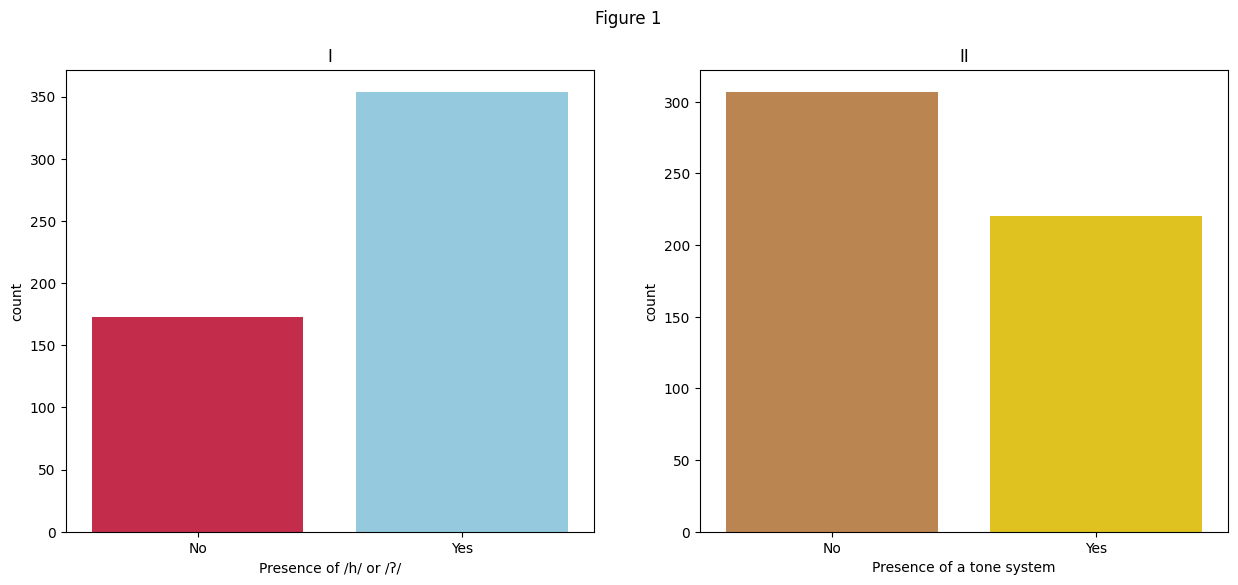

In [28]:
# Creation of a panel and its subplots
fig, axs = plt.subplots(1, 3, figsize=(15, 6))
fig.suptitle("Figure 1")

# Countplot for the "glottal_consonants" variable
plt.subplot(1,2,1)
sns.countplot(x=df["glottal_consonants"], palette = ['crimson','skyblue'])
plt.gca().set_xticklabels(["No", "Yes"])
plt.gca().set_xlabel("Presence of /h/ or /ʔ/")
plt.gca().set_title("I")
# Countplot for the "Tone system" variable
plt.subplot(1,2,2)
sns.countplot(x= df["Tone system"], palette=['peru', 'gold'])
plt.gca().set_xlabel("Presence of a tone system")
plt.gca().set_xticklabels(["No", "Yes"])
plt.gca().set_title("II")


It seems that our dataset contains an almost twice larger proportion of languages having /h/ or /ʔ/ in their phonetic inventories.
But we stil have a fair amount of langugaes without it. It appears that tone languages represent slightly more than 1/3 of all the languages.

Our sample seems satisfactory as it is very large but let's see if it is indeed representative by plotting the data points on maps.
We first need to get the coordinates of our data points to plot them on map. We shall group them depending on whether they have the /h/ or /ʔ/ consonants or not for Map I; and depending on their tone system for map 2.

In [29]:
# x and y coordinates (longitude and latitude) for languages with /h/ or /ʔ/ consonants
x_glottal = df.query("glottal_consonants == 1")['Longitude']
y_glottal = df.query("glottal_consonants == 1")['Latitude']
# x and y coordinates (longitude and latitude) for languages without /h/ or /ʔ/ consonants
x_other = df.query("glottal_consonants == 0")['Longitude']
y_other = df.query("glottal_consonants == 0")['Latitude']

In [30]:
# x and y coordinates (longitude and latitude) for languages with no tone system
x_no = df[df['Tone system'] == 0]['Longitude']
y_no = df[df['Tone system'] == 0]['Latitude']

# x and y coordinates (longitude and latitude) for languages with a simple tone system
x_tones = df[df['Tone system'] == 1]['Longitude']
y_tones = df[df['Tone system'] == 1]['Latitude']




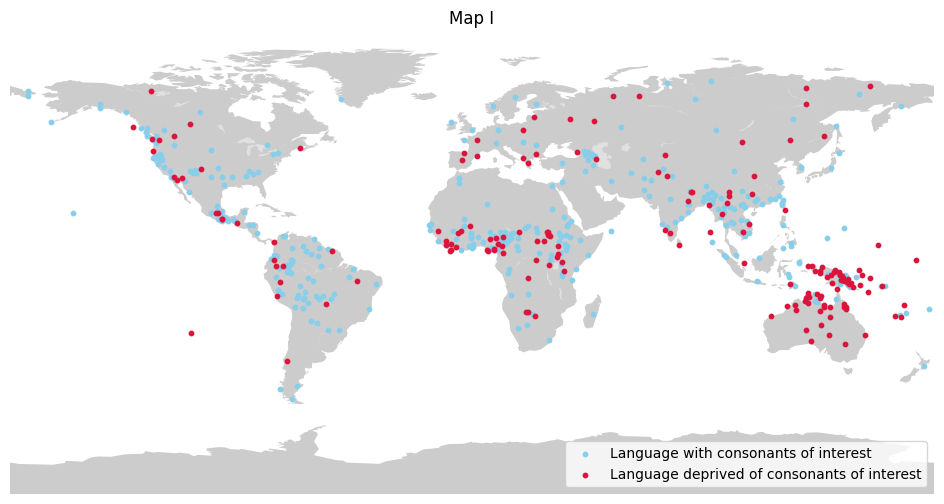

In [31]:
plt.figure(figsize=(12, 6)) #define the size
m = Basemap(projection='cyl', # type of projection
            lat_0=0, # latitude of the map center
            lon_0=0, # longitude of the map center
            resolution='c') # low resolution (crude)
m.fillcontinents(color='gray', # color of the continents
                 lake_color='white', # color of the lakes
                 alpha=0.4) # transparency of the fill
m.scatter(x_glottal, # longitudes
          y_glottal, # latitudes
          latlon=True, # interpret x, y as longitude and latitude 
          label='Language with consonants of interest', # label for the legend
          color='skyblue', s=10) # color and size of the points
m.scatter(x_other,
          y_other,
          latlon=True,
          label='Language deprived of consonants of interest',
          color='crimson', s=10)
plt.legend() # legenc
plt.title("Map I") # title
# remove map border (for aesthetic reasons)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['bottom'].set_visible(False)
plt.gca().spines['left'].set_visible(False)
plt.show() # show the plot

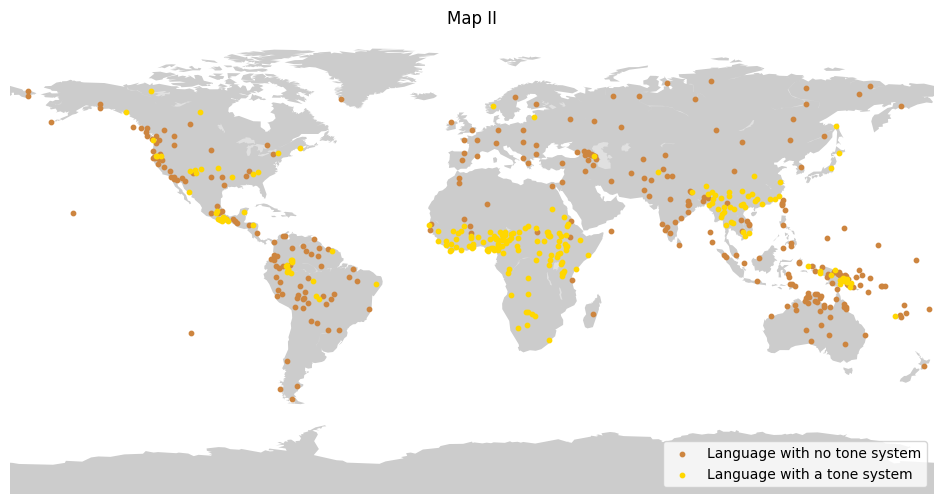

In [32]:
plt.figure(figsize=(12, 6)) #define the size
m = Basemap(projection='cyl', # type of projection
            lat_0=0, # latitude of the map center
            lon_0=0, # longitude of the map center
            resolution='c') # low resolution (crude)
m.fillcontinents(color='gray', # color of the continents
                 lake_color='white', # color of the lakes
                 alpha=0.4) # transparency of the fill
m.scatter(x_no, # longitudes
          y_no, # latitudes
          latlon=True, # interpret x, y as longitude and latitude 
          label='Language with no tone system', # label for the legend
          color='peru', s=10) # color and size of the points
m.scatter(x_tones,
          y_tones,
          latlon=True,
          label='Language with a tone system',
          color='gold', s=10)
plt.legend() # legend
plt.title("Map II") # title
# remove map border (for aesthetic reasons)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['bottom'].set_visible(False)
plt.gca().spines['left'].set_visible(False)
plt.show() # show the plot


We can see that we are fortunate to have such a large and diverse sample of points.

# 2.3 Bivariate description and contingency table

Herei is a bivariate description of our 2 variables.

c:\Users\sacha\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


Text(0.5, 1.0, 'Figure 2')

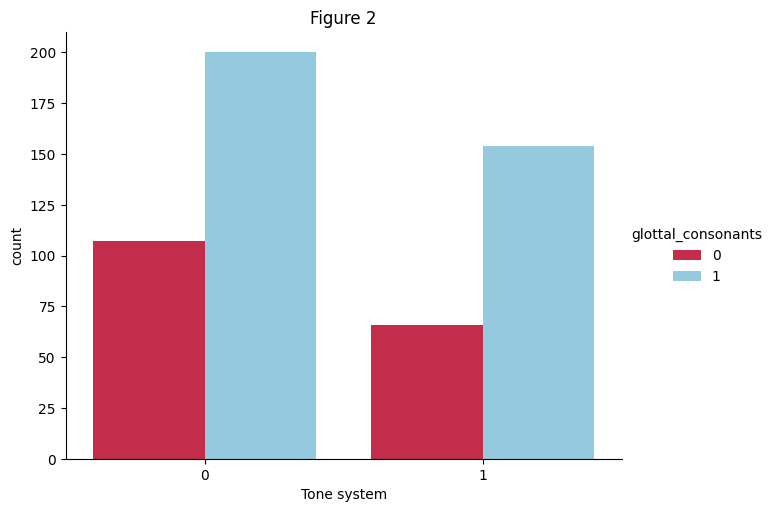

In [33]:
sns.catplot(data = df, x='Tone system', hue='glottal_consonants', kind='count', palette = ['crimson','skyblue'], height=5, aspect=1.3)
plt.title("Figure 2") # consistency of the color palette


It looks as if there were no (or a very subtle) relionship between our variables. It seems, though, that the proportion of languages without tones that have these consonants is smaller than that of languages with a simple or complex tone system. But we need to perform a statistical test to assert that.

# 3. Analysis

## 3.1 All 570 languages

AS we are dealing with two categorial variables a chi²-test seems relevant to see whether the distribution of the data across the two is due to chance or if there is a relation between the two.

In [34]:
from scipy.stats import chi2_contingency

In [35]:
summary_table = df.groupby(['glottal_consonants', 'Tone system']).size().unstack(fill_value=0) # compute the summary table of the variables
chi2_stat, p_value, _, _  = chi2_contingency(summary_table) # perform the test
print("Chi-square statistic for 'Tone system':", chi2_stat)
print(f"p-value for 'Tone system': {p_value:.10}")

# Compute percentages for each value in the summary table 
summary_table_percentage = summary_table.div(summary_table.sum(axis=0), axis=1) * 100
summary_table_percentage

Chi-square statistic for 'Tone system': 1.157792601874298
p-value for 'Tone system': 0.2819238062


Tone system,0,1
glottal_consonants,,
0,34.85342,30.0
1,65.14658,70.0


It would seem that a language with tones is more likely to contain /h/ or /ʔ/ in its inventory ($70 > 65$%), as we predicted it.
However the results of the test show that there is no significant relation between our two variables ($p = 0.282$). So the observed difference doesn't mean much here.

But a relationship of this kind, as discussed in the introduction, may be only significant for *asian languages*.
We will test this hypothesis by replicating our former analysis with a subset of asian languages.

## 3.2 Asian (families of) languages only

In [36]:
# We create a subset of df by keeping only languages that belongs to asian language family (austro-asiatic, tai-kadai etc.)
asian = df[(df["Family"] == "Austro-Asiatic") | ((df["Family"] == "Tai-Kadai")) | (df["Family"] == "Sino-Tibetan")]
asian.shape

(50, 9)

We end up with 50 languages only. Let's replicate figure 2 for this new dataset and then perform Fisher's exact test (small number of values).

c:\Users\sacha\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


Text(0.5, 1.0, 'Figure 3')

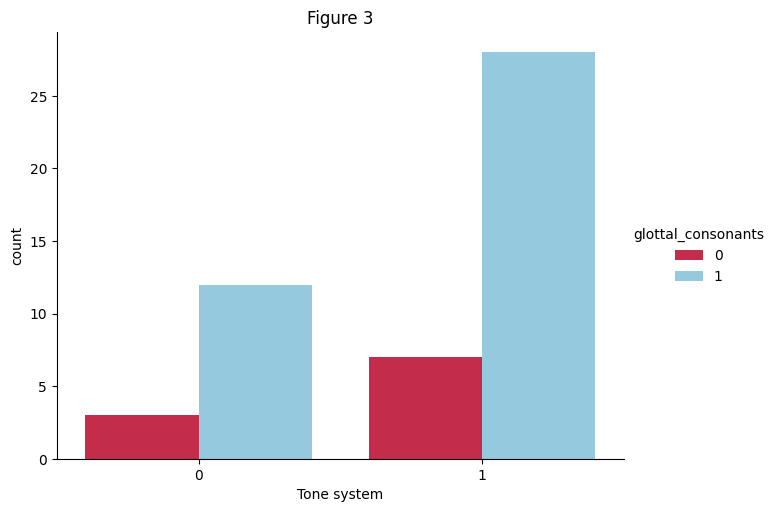

In [37]:
sns.catplot(data = asian, x='Tone system', hue='glottal_consonants', kind='count', palette = ['crimson','skyblue'], height=5, aspect=1.3)
plt.title("Figure 3")# consistency of the color palette


In [38]:
from scipy.stats import fisher_exact

summary_table2 = asian.groupby(['glottal_consonants', 'Tone system']).size().unstack(fill_value=0) #  compute the summary table of the variables
odds_ratio, p_value = fisher_exact(summary_table2) # perform the test
print(f"Odds ratio: {odds_ratio}")
print(f"P-value: {p_value}")

# Compute percentages for each value in the summary table 

summary_table_percentage2 = summary_table2.div(summary_table2.sum(axis=0), axis=1) * 100
summary_table_percentage2

Odds ratio: 1.0
P-value: 1.0


Tone system,0,1
glottal_consonants,,
0,20.0,20.0
1,80.0,80.0


Here, the tone system and the the glottal consonants variables are absolutely independant ($p = 1.0$). Quite unexpectedly the proportion of languges with /h/ or /ʔ/ is equal for non-tonal and tonal languages. Our prediction is not verified for asian languages in particular and the null hypothesis wins.

We give possible explanations for these results in the following section.

# 4. Conclusion.

There happens to be no significant relationship between the presence of tones and the presence of glottal consonants such as /h/ or /ʔ/ in a language. As a matter of fact, in a dataset gathering 527 languages from all around the world, we"ve found that, as we had expected, the proportion of languages endowed with such consonants was higher among tone languages than among others. But a Chi-squared test has proved that those results could have happened by chance only. In the specific case of asian languages, as opposed to what we had expected, our two variables were perfectly independant. It might be that the case of China is more common than what we thought.

Eventually, if the presence of the aforementioned glottal consonants in might be linked to tonogesis in the case of Vietnamese, this relationship doesn't hold true more broadly, even for asian languages. Phonetic grounds for tonogesis may often be very language-specific. It seems difficult to find a more or less general breeding ground for tonogesis. However it is a subject open to further research. In particular, more ambitious tonogesis studies than ours, that would use historical data would be very interesting.

